In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Suhas/Downloads/ADANIPORTS.csv")

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Use only the 'Close' column for prediction
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(len(dataset) * 0.95)

# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

In [3]:
import numpy as np

# Create the training dataset
train_data = scaled_data[0: int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

In [5]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

3095/3095 [==============================] - 160s 49ms/step - loss: 0.0012


In [6]:
# Create the testing dataset
test_data = scaled_data[training_data_len -60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 3s 35ms/step


In [7]:
# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)

RMSE:  20.360194890775336


C:\Users\Suhas\AppData\Local\Temp\ipykernel_9956\214645225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predictions


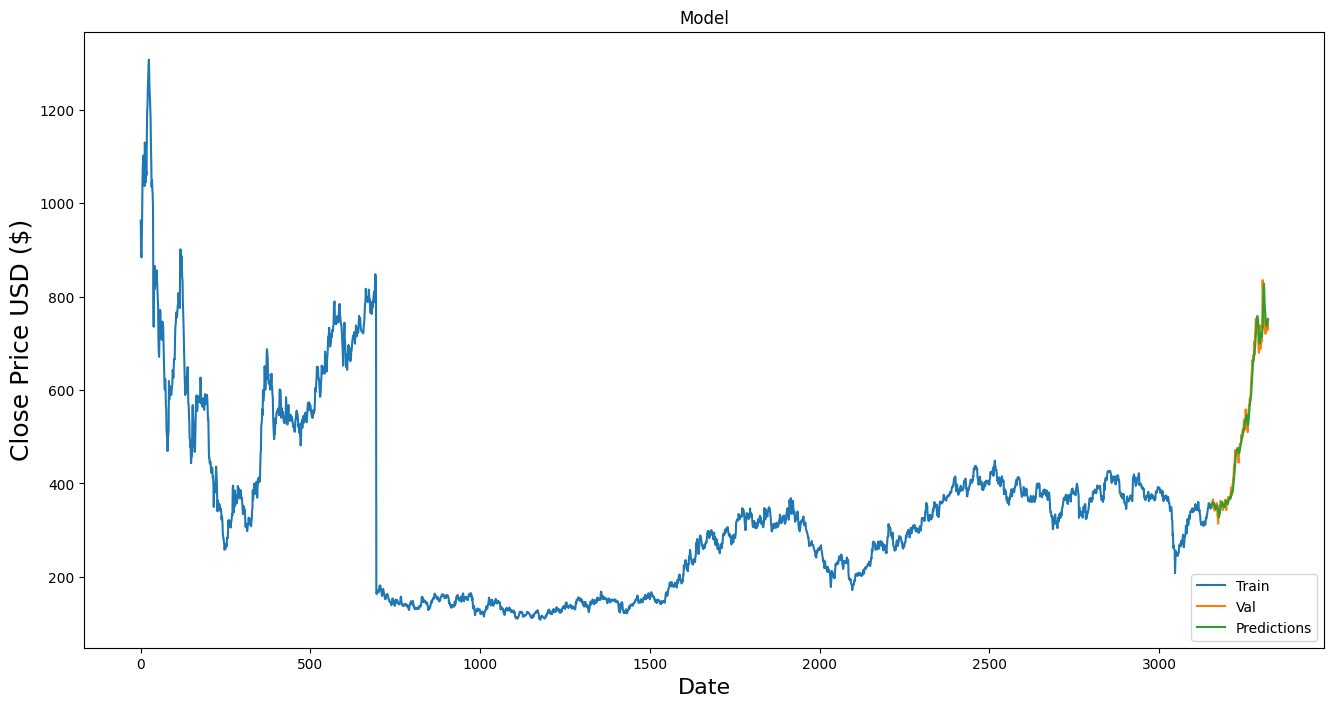

In [8]:
import matplotlib.pyplot as plt

#Plot the data
train = data[: training_data_len]
valid = data[training_data_len: ]
valid.loc[:, 'Predictions'] = predictions

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()